In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = {
    'Name' : ['John' , 'Joy' , 'Bob' , 'Charlie' , 'Jacob'],
    'Age' : [23,25,22,27,26],
    'City' : ['NewYork' , 'Paris' , 'Tokyo' , 'Los Angeles' , 'Beijing'],
    'Salary' : [22000 , 31000 , 20000 , 50000, 44329.5],
    'Weight' : [65 , 64.4 , 56.3 , 76 , '78kgs'],
    'Vehicle_Subsrbied' : [True , True , False , False , False]
}

df = pd.DataFrame(data)

df

,Name,Age,City,Salary,Weight,Vehicle_Subsrbied
0,John,23,NewYork,22000.0,65,True
1,Joy,25,Paris,31000.0,64.4,True
2,Bob,22,Tokyo,20000.0,56.3,False
3,Charlie,27,Los Angeles,50000.0,76,False
4,Jacob,26,Beijing,44329.5,78kgs,False


In [13]:
def checkDtype(x):
  return type(x)
checkDtype(8.3)

float

In [14]:
df['Weight'].apply(checkDtype)

0      <class 'int'>
1    <class 'float'>
2    <class 'float'>
3      <class 'int'>
4      <class 'str'>
Name: Weight, dtype: object

In [15]:
df.applymap(checkDtype)

,Name,Age,City,Salary,Weight,Vehicle_Subsrbied
0,<class 'str'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'int'>,<class 'bool'>
1,<class 'str'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'bool'>
2,<class 'str'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'float'>,<class 'bool'>
3,<class 'str'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'int'>,<class 'bool'>
4,<class 'str'>,<class 'int'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'bool'>


In [16]:
df[['Name', 'City']]

,Name,City
0,John,NewYork
1,Joy,Paris
2,Bob,Tokyo
3,Charlie,Los Angeles
4,Jacob,Beijing


In [17]:
#df.loc[row selection , column selection]
df.loc[ 1:3 , :]

,Name,Age,City,Salary,Weight,Vehicle_Subsrbied
1,Joy,25,Paris,31000.0,64.4,True
2,Bob,22,Tokyo,20000.0,56.3,False
3,Charlie,27,Los Angeles,50000.0,76,False


In [18]:
df.loc[ 1:3 , 'Name' : 'Salary']

,Name,Age,City,Salary
1,Joy,25,Paris,31000.0
2,Bob,22,Tokyo,20000.0
3,Charlie,27,Los Angeles,50000.0


In [19]:
df.loc[ [1,3] , ['Name' , 'Salary']]

,Name,Salary
1,Joy,31000.0
3,Charlie,50000.0


In [20]:
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
#filter all male passengers not travelling in class 1
df_m23 = df[(df['Sex'] == 'male') & (df['Pclass'] != 1)]
df_m23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [22]:
df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [23]:
#Number of Male Passengers travelling in each class
print('C1_Male' , ((df['Pclass'] == 1) & (df['Sex'] == 'male')).sum())
print('C2_Male' , ((df['Pclass'] == 2) & (df['Sex'] == 'male')).sum())
print('C3_Male' , ((df['Pclass'] == 3) & (df['Sex'] == 'male')).sum())

C1_Male 57
C2_Male 63
C3_Male 146


In [24]:
dff = df.groupby(['Pclass', 'Sex'])
dff.first()

PassengerId  Survived  \
Pclass Sex                             
1      female          904         1   
       male            903         0   
2      female          907         1   
       male            894         0   
3      female          893         1   
       male            892         0   

                                                        Name   Age  SibSp  \
Pclass Sex                                                                  
1      female  Snyder, Mrs. John Pillsbury (Nelle Stevenson)  23.0      1   
       male                       Jones, Mr. Charles Cresson  46.0      0   
2      female  del Carlo, Mrs. Sebastiano (Argenia Genovesi)  24.0      1   
       male                        Myles, Mr. Thomas Francis  62.0      0   
3      female               Wilkes, Mrs. James (Ellen Needs)  47.0      1   
       male                                 Kelly, Mr. James  34.5      0   

               Parch         Ticket     Fare  Cabin Embarked  
Pclass Sex                                                    
1      female      0          21228  82.2667    B45        S  
       male        0            694  26.0000    A21        S  
2      female      0  SC/PARIS 2167  27.7208     F4        C  
       male        0         240276   9.6875      F        Q  
3      female      0         363272   7.0000     G6        S  
       male        0         330911   7.8292  F G63        Q

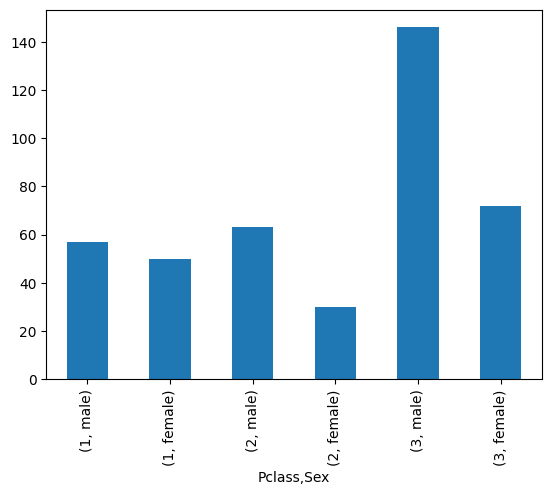

In [25]:
dff = df.groupby('Pclass')['Sex'].value_counts().plot.bar()

In [26]:
#Number of Male Passengers who could not survived
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      266
1         female    152
Name: Sex, dtype: int64

In [27]:
import numpy as np

data = {
    'Name' : ['John' , 'Joy' , 'Bob' , 'Charlie' , 'Jacob','narendra'],
    'Age' :  [23,25,22,27,26,25],
    'City' : ['NewYork' , 'Paris' , 'Tokyo' , np.nan , 'Los Angeles' , 'Beijing']
}
dfk = pd.DataFrame(data)
dfk

,Name,Age,City
0,John,23,NewYork
1,Joy,25,Paris
2,Bob,22,Tokyo
3,Charlie,27,NaN
4,Jacob,26,Los Angeles
5,narendra,25,Beijing


In [28]:
dfk.isnull()

,Name,Age,City
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,False


In [29]:
dfk.isnull().sum()

Name    0
Age     0
City    1
dtype: int64

In [30]:
#Remove the rows - In case the samples with null values are lesser then 1 to 2 %

df1 = df.dropna(subset = ['Embarked'] , axis='rows')    #Removed two rows with missing values in Embarked
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
#Remove the columns - In case where more then 50% of values are missing the column becomes irrelevant
df2 = df1.drop('Cabin' , axis = 'columns')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [32]:
df2.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [33]:
mean_age = round(df2['Fare'].mean(),2)

In [34]:
df2['Fare'] = df2['Fare'].fillna(mean_age)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [35]:
df2.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [36]:
df = pd.read_csv('chipotle.tsv', sep = '\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [37]:
df['item_price'] = df['item_price'].str.replace('$', '')
df = df.head()

<ipython-input-37-78d4e10061d1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$', '')


In [38]:
df['item_price'] = df['item_price'].astype(float)
print(df['item_price'].dtype)
df['item_price'].mean()

float64


5.708

In [39]:
# Group by 'item_name' and calculate the total quantity ordered for each item
total_quantity = df.groupby('item_name')['quantity'].sum()
print(total_quantity)
print("=========================================================")

# Group by 'item_name' and calculate the total revenue for each item
total_revenue = df.groupby('item_name')['item_price'].sum()
print(total_revenue)
print('=========================================================')

# Group by 'choice_description' and count the number of times each choice description appears
choice_counts = df.groupby('choice_description')['order_id'].count()
print(choice_counts)
print('==========================================================')

# Group by 'order_id' and calculate the total order amount for each order
order_total = df.groupby('order_id')['item_price'].sum()
print(order_total)


item_name
Chicken Bowl                             2
Chips and Fresh Tomato Salsa             1
Chips and Tomatillo-Green Chili Salsa    1
Izze                                     1
Nantucket Nectar                         1
Name: quantity, dtype: int64
item_name
Chicken Bowl                             16.98
Chips and Fresh Tomato Salsa              2.39
Chips and Tomatillo-Green Chili Salsa     2.39
Izze                                      3.39
Nantucket Nectar                          3.39
Name: item_price, dtype: float64
choice_description
[Apple]                                                                       1
[Clementine]                                                                  1
[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]    1
Name: order_id, dtype: int64
order_id
1    11.56
2    16.98
Name: item_price, dtype: float64


In [40]:
#minimum , maximum and average order price
df.groupby('item_name')['item_price'].agg(['min' , 'max' , 'mean']).sort_values('mean' , ascending = False)

,min,max,mean
item_name,,,
Chicken Bowl,16.98,16.98,16.98
Izze,3.39,3.39,3.39
Nantucket Nectar,3.39,3.39,3.39
Chips and Fresh Tomato Salsa,2.39,2.39,2.39
Chips and Tomatillo-Green Chili Salsa,2.39,2.39,2.39


<Axes: xlabel='item_name'>

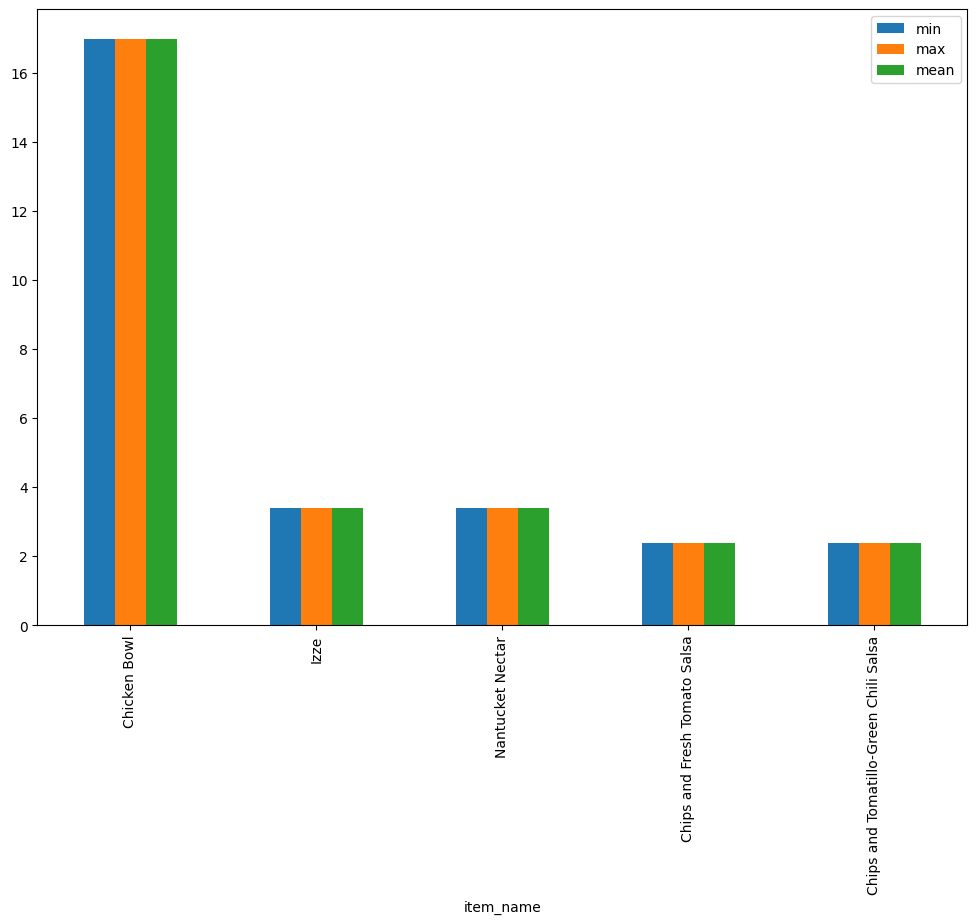

In [41]:
df.groupby('item_name')['item_price'].agg(['min' , 'max' , 'mean']).sort_values('mean' , ascending = False).plot.bar(figsize = (12,8))

In [42]:
df[df['item_name'] == 'Chips and Fresh Tomato Salsa'].describe()

,order_id,quantity,item_price
count,1.0,1.0,1.00
mean,1.0,1.0,2.39
std,NaN,NaN,NaN
min,1.0,1.0,2.39
25%,1.0,1.0,2.39
50%,1.0,1.0,2.39
75%,1.0,1.0,2.39
max,1.0,1.0,2.39


In [43]:
dfItemDetails = df.groupby('item_name')['item_price','quantity'].sum()
dfItemDetails['PerItemCost'] = dfItemDetails['item_price'] / dfItemDetails['quantity']
dfItemDetails.sort_values('PerItemCost' , ascending = False)

<ipython-input-43-4ff2e2ee365a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfItemDetails = df.groupby('item_name')['item_price','quantity'].sum()


,item_price,quantity,PerItemCost
item_name,,,
Chicken Bowl,16.98,2,8.49
Izze,3.39,1,3.39
Nantucket Nectar,3.39,1,3.39
Chips and Fresh Tomato Salsa,2.39,1,2.39
Chips and Tomatillo-Green Chili Salsa,2.39,1,2.39


In [44]:
dfc = df[df['item_name'].str.contains('Chicken')]
dfc

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [45]:
dfc.item_name.unique()
# Here every chicken variety will be known

array(['Chicken Bowl'], dtype=object)

In [46]:
df[df['item_name'].str.contains('Bowl')].item_name.value_counts()

Chicken Bowl    1
Name: item_name, dtype: int64

In [47]:
df = pd.read_csv('IPL_Matches_2008_2022.csv')
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [48]:
print(df['Team1'].unique() , len(df['Team1'].unique()))

['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala'] 18


In [49]:
print(df['Team2'].unique() , len(df['Team2'].unique()))

['Gujarat Titans' 'Rajasthan Royals' 'Lucknow Super Giants' 'Punjab Kings'
 'Mumbai Indians' 'Royal Challengers Bangalore' 'Kolkata Knight Riders'
 'Sunrisers Hyderabad' 'Delhi Capitals' 'Chennai Super Kings'
 'Kings XI Punjab' 'Delhi Daredevils' 'Rising Pune Supergiant'
 'Gujarat Lions' 'Rising Pune Supergiants' 'Pune Warriors'
 'Deccan Chargers' 'Kochi Tuskers Kerala'] 18


In [50]:
print(df['TossWinner'].unique() , len(df['TossWinner'].unique()))

['Rajasthan Royals' 'Lucknow Super Giants' 'Gujarat Titans'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Chennai Super Kings'
 'Punjab Kings' 'Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Delhi Capitals' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala'] 18


In [51]:
print(df['WinningTeam'].unique() , len(df['WinningTeam'].unique()))

['Gujarat Titans' 'Rajasthan Royals' 'Royal Challengers Bangalore'
 'Punjab Kings' 'Mumbai Indians' 'Lucknow Super Giants'
 'Sunrisers Hyderabad' 'Delhi Capitals' 'Kolkata Knight Riders'
 'Chennai Super Kings' 'Kings XI Punjab' nan 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala'] 19


In [52]:
def convertlower(x):
  if type(x) == str:
    return x.lower()
  else:
    return x

In [53]:
genlower = lambda x : x.lower() if type(x) == str else x
print(genlower('Bipul'))
print(genlower(99))

bipul
99


In [54]:
dosum = lambda x,y : x + y
dosum(4,9)

13

In [55]:
#create a lambda function to check if a number is even or odd
evenorodd = lambda x : "even" if x % 2 == 0 else "Odd"
print(evenorodd(9))
print(evenorodd(12))

Odd
even


In [56]:
df = df.applymap(lambda x : x.lower() if type(x) == str else x)
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,n,gujarat titans,wickets,7.0,NaN,hh pandya,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",cb gaffaney,nitin menon
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,n,rajasthan royals,wickets,7.0,NaN,jc buttler,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...",cb gaffaney,nitin menon
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,"eden gardens, kolkata",lucknow super giants,field,n,royal challengers bangalore,runs,14.0,NaN,rm patidar,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['q de kock', 'kl rahul', 'm vohra', 'dj hooda...",j madanagopal,ma gough
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,"eden gardens, kolkata",gujarat titans,field,n,gujarat titans,wickets,7.0,NaN,da miller,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",bnj oxenford,vk sharma
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,"wankhede stadium, mumbai",sunrisers hyderabad,bat,n,punjab kings,wickets,5.0,NaN,harpreet brar,"['pk garg', 'abhishek sharma', 'ra tripathi', ...","['jm bairstow', 's dhawan', 'm shahrukh khan',...",ak chaudhary,na patwardhan


In [57]:
print(len(df['Team1'].unique()))
print(len(df['Team2'].unique()))
print(len(df['TossWinner'].unique()))
print(len(df['WinningTeam'].unique()))

18
18
18
19


In [58]:
df.dtypes

ID                   int64
City                object
Date                object
Season              object
MatchNumber         object
Team1               object
Team2               object
Venue               object
TossWinner          object
TossDecision        object
SuperOver           object
WinningTeam         object
WonBy               object
Margin             float64
method              object
Player_of_Match     object
Team1Players        object
Team2Players        object
Umpire1             object
Umpire2             object
dtype: object

In [59]:
print(df['Date'].min())
print(df['Date'].max())

2008-04-18
2022-05-29


In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

ID                          int64
City                       object
Date               datetime64[ns]
Season                     object
MatchNumber                object
Team1                      object
Team2                      object
Venue                      object
TossWinner                 object
TossDecision               object
SuperOver                  object
WinningTeam                object
WonBy                      object
Margin                    float64
method                     object
Player_of_Match            object
Team1Players               object
Team2Players               object
Umpire1                    object
Umpire2                    object
dtype: object

In [61]:
print(df['Date'].min())
print(df['Date'].max())

2008-04-18 00:00:00
2022-05-29 00:00:00


In [62]:
#Team who won Maximum number of matches
df['WinningTeam'].value_counts()

mumbai indians                 131
chennai super kings            121
kolkata knight riders          114
royal challengers bangalore    109
rajasthan royals                96
kings xi punjab                 88
sunrisers hyderabad             75
delhi daredevils                67
delhi capitals                  36
deccan chargers                 29
gujarat lions                   13
punjab kings                    13
pune warriors                   12
gujarat titans                  12
rising pune supergiant          10
lucknow super giants             9
kochi tuskers kerala             6
rising pune supergiants          5
Name: WinningTeam, dtype: int64

In [63]:
print(df['WinningTeam'].value_counts().idxmax() , df['WinningTeam'].value_counts().max())

mumbai indians 131


In [64]:
print(df['Team1'].unique())
print("*****************")
print(df['Team2'].unique())

['rajasthan royals' 'royal challengers bangalore' 'sunrisers hyderabad'
 'delhi capitals' 'chennai super kings' 'gujarat titans'
 'lucknow super giants' 'kolkata knight riders' 'punjab kings'
 'mumbai indians' 'kings xi punjab' 'delhi daredevils'
 'rising pune supergiant' 'gujarat lions' 'rising pune supergiants'
 'pune warriors' 'deccan chargers' 'kochi tuskers kerala']
*****************
['gujarat titans' 'rajasthan royals' 'lucknow super giants' 'punjab kings'
 'mumbai indians' 'royal challengers bangalore' 'kolkata knight riders'
 'sunrisers hyderabad' 'delhi capitals' 'chennai super kings'
 'kings xi punjab' 'delhi daredevils' 'rising pune supergiant'
 'gujarat lions' 'rising pune supergiants' 'pune warriors'
 'deccan chargers' 'kochi tuskers kerala']


In [65]:
df = df.applymap(lambda x : 'rising pune supergiants' if x == 'rising pune supergiant' else x)

In [66]:
t1 = df['Team1'].value_counts()
t1

royal challengers bangalore    126
mumbai indians                 112
chennai super kings            111
kolkata knight riders          105
kings xi punjab                 92
rajasthan royals                89
delhi daredevils                85
sunrisers hyderabad             69
deccan chargers                 39
delhi capitals                  29
pune warriors                   23
punjab kings                    18
gujarat lions                   16
rising pune supergiants         14
lucknow super giants             8
gujarat titans                   7
kochi tuskers kerala             7
Name: Team1, dtype: int64

In [67]:
t2 = df['Team2'].value_counts()
t2

mumbai indians                 119
kolkata knight riders          118
rajasthan royals               103
royal challengers bangalore    100
kings xi punjab                 98
chennai super kings             97
sunrisers hyderabad             83
delhi daredevils                76
deccan chargers                 36
delhi capitals                  34
pune warriors                   23
rising pune supergiants         16
gujarat lions                   14
punjab kings                    10
gujarat titans                   9
lucknow super giants             7
kochi tuskers kerala             7
Name: Team2, dtype: int64

In [68]:
#Team played maximum and minimum matches
total_matches = pd.concat((t1 , t2) , axis = 1).sum(axis=1)
total_matches

royal challengers bangalore    226
mumbai indians                 231
chennai super kings            208
kolkata knight riders          223
kings xi punjab                190
rajasthan royals               192
delhi daredevils               161
sunrisers hyderabad            152
deccan chargers                 75
delhi capitals                  63
pune warriors                   46
punjab kings                    28
gujarat lions                   30
rising pune supergiants         30
lucknow super giants            15
gujarat titans                  16
kochi tuskers kerala            14
dtype: int64

In [69]:
print(total_matches.idxmax() , total_matches.max())

mumbai indians 231


In [70]:
print(total_matches.idxmin() , total_matches.min())

kochi tuskers kerala 14


In [71]:
for val in t1.keys():
  print(val in total_matches.keys())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [72]:
for val in t2.keys():
  print(val in total_matches.keys())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [73]:
print(len(t1) , len(t2) , len(total_matches) )

17 17 17


In [74]:
#Teams who played maximum finals, Eliminator & Qualifier respectively

df_final = df[df['MatchNumber'] == 'final']
df_final.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,n,gujarat titans,wickets,7.0,NaN,hh pandya,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",cb gaffaney,nitin menon
74,1254117,dubai,2021-10-15,2021,final,chennai super kings,kolkata knight riders,dubai international cricket stadium,kolkata knight riders,field,n,chennai super kings,runs,27.0,NaN,f du plessis,"['rd gaikwad', 'f du plessis', 'rv uthappa', '...","['shubman gill', 'vr iyer', 'n rana', 'sp nari...",nitin menon,rk illingworth
134,1237181,NaN,2020-11-10,2020/21,final,delhi capitals,mumbai indians,dubai international cricket stadium,delhi capitals,bat,n,mumbai indians,wickets,5.0,NaN,ta boult,"['mp stoinis', 's dhawan', 'am rahane', 'ss iy...","['rg sharma', 'q de kock', 'sa yadav', 'ishan ...",cb gaffaney,nitin menon
194,1181768,hyderabad,2019-05-12,2019,final,mumbai indians,chennai super kings,rajiv gandhi international stadium,mumbai indians,bat,n,mumbai indians,runs,1.0,NaN,jj bumrah,"['q de kock', 'rg sharma', 'sa yadav', 'ishan ...","['f du plessis', 'sr watson', 'sk raina', 'at ...",ij gould,nitin menon
254,1136620,mumbai,2018-05-27,2018,final,sunrisers hyderabad,chennai super kings,wankhede stadium,chennai super kings,field,n,chennai super kings,wickets,8.0,NaN,sr watson,"['sp goswami', 's dhawan', 'ks williamson', 's...","['sr watson', 'f du plessis', 'sk raina', 'at ...",m erasmus,s ravi


In [75]:
t1Final = df_final['Team1'].value_counts()
t1Final

chennai super kings            5
mumbai indians                 3
royal challengers bangalore    2
kolkata knight riders          2
rajasthan royals               1
delhi capitals                 1
sunrisers hyderabad            1
Name: Team1, dtype: int64

In [76]:
t2Final = df_final['Team2'].value_counts()
t2Final

chennai super kings            4
mumbai indians                 3
gujarat titans                 1
kolkata knight riders          1
rising pune supergiants        1
sunrisers hyderabad            1
kings xi punjab                1
royal challengers bangalore    1
deccan chargers                1
rajasthan royals               1
Name: Team2, dtype: int64

In [77]:
pd.concat((t1Final,t2Final) , axis= 1)

,Team1,Team2
chennai super kings,5.0,4.0
mumbai indians,3.0,3.0
royal challengers bangalore,2.0,1.0
kolkata knight riders,2.0,1.0
rajasthan royals,1.0,1.0
delhi capitals,1.0,NaN
sunrisers hyderabad,1.0,1.0
gujarat titans,NaN,1.0
rising pune supergiants,NaN,1.0
kings xi punjab,NaN,1.0


In [78]:
numFinals = pd.concat((t1Final,t2Final) , axis= 1).sum(axis=1)
numFinals

chennai super kings            9.0
mumbai indians                 6.0
royal challengers bangalore    3.0
kolkata knight riders          3.0
rajasthan royals               2.0
delhi capitals                 1.0
sunrisers hyderabad            2.0
gujarat titans                 1.0
rising pune supergiants        1.0
kings xi punjab                1.0
deccan chargers                1.0
dtype: float64

<Axes: >

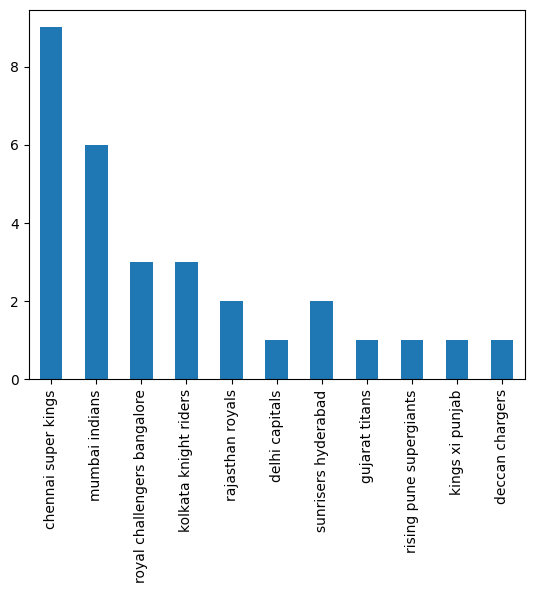

In [79]:
numFinals.plot.bar()

In [80]:
#Number of times each team played Eliminator & Qualifier respectively
df_Eliminator = df[df['MatchNumber'] == 'eliminator']
t1Eliminator = df_Eliminator['Team1'].value_counts()
t1Eliminator
t2Eliminator = df_Eliminator['Team2'].value_counts()
t2Eliminator
numEliminator = pd.concat((t1Eliminator,t2Eliminator) , axis= 1).sum(axis=1)
numEliminator

royal challengers bangalore    4.0
sunrisers hyderabad            4.0
kolkata knight riders          3.0
chennai super kings            1.0
rajasthan royals               3.0
lucknow super giants           1.0
delhi capitals                 1.0
mumbai indians                 1.0
dtype: float64

In [81]:
df_qual = df[df['MatchNumber'] == 'qualifier']
t1q = df_qual['Team1'].value_counts()
t2q = df_qual['Team2'].value_counts()
numQualifier = pd.concat((t1q,t2q) , axis = 1).sum(axis=1)
numQualifier

sunrisers hyderabad      2.0
delhi capitals           1.0
chennai super kings      3.0
mumbai indians           1.0
kolkata knight riders    1.0
dtype: float64

In [82]:
#final, eliminator & qualifier

df_feq = df[df['MatchNumber'].isin(['final','eliminator','qualifier'])]
t1_feq = df_feq['Team1'].value_counts()
t2_feq = df_feq['Team2'].value_counts()

num_feq = pd.concat((t1_feq,t2_feq) , axis=1).sum(axis=1)
num_feq

chennai super kings            13.0
royal challengers bangalore     7.0
sunrisers hyderabad             8.0
mumbai indians                  8.0
kolkata knight riders           7.0
rajasthan royals                5.0
delhi capitals                  3.0
gujarat titans                  1.0
lucknow super giants            1.0
rising pune supergiants         1.0
kings xi punjab                 1.0
deccan chargers                 1.0
dtype: float64

In [83]:
#Total number of final wins
num_finalWins = df_final['WinningTeam'].value_counts()
num_finalWins

mumbai indians           5
chennai super kings      4
kolkata knight riders    2
gujarat titans           1
sunrisers hyderabad      1
deccan chargers          1
rajasthan royals         1
Name: WinningTeam, dtype: int64

In [84]:
numFinals

chennai super kings            9.0
mumbai indians                 6.0
royal challengers bangalore    3.0
kolkata knight riders          3.0
rajasthan royals               2.0
delhi capitals                 1.0
sunrisers hyderabad            2.0
gujarat titans                 1.0
rising pune supergiants        1.0
kings xi punjab                1.0
deccan chargers                1.0
dtype: float64

In [85]:
trophywins = pd.concat((numFinals,num_finalWins) , axis = 1)
trophywins.columns = ['NumOfFinals' , 'NumOfWins']
trophywins = trophywins.fillna(0)
trophywins

,NumOfFinals,NumOfWins
chennai super kings,9.0,4.0
mumbai indians,6.0,5.0
royal challengers bangalore,3.0,0.0
kolkata knight riders,3.0,2.0
rajasthan royals,2.0,1.0
delhi capitals,1.0,0.0
sunrisers hyderabad,2.0,1.0
gujarat titans,1.0,1.0
rising pune supergiants,1.0,0.0
kings xi punjab,1.0,0.0


In [86]:
percentage = round((trophywins.NumOfWins / trophywins.NumOfFinals)*100 , 2)
trophywins['Percentage'] = percentage

In [87]:
trophywins

,NumOfFinals,NumOfWins,Percentage
chennai super kings,9.0,4.0,44.44
mumbai indians,6.0,5.0,83.33
royal challengers bangalore,3.0,0.0,0.00
kolkata knight riders,3.0,2.0,66.67
rajasthan royals,2.0,1.0,50.00
delhi capitals,1.0,0.0,0.00
sunrisers hyderabad,2.0,1.0,50.00
gujarat titans,1.0,1.0,100.00
rising pune supergiants,1.0,0.0,0.00
kings xi punjab,1.0,0.0,0.00


<Axes: >

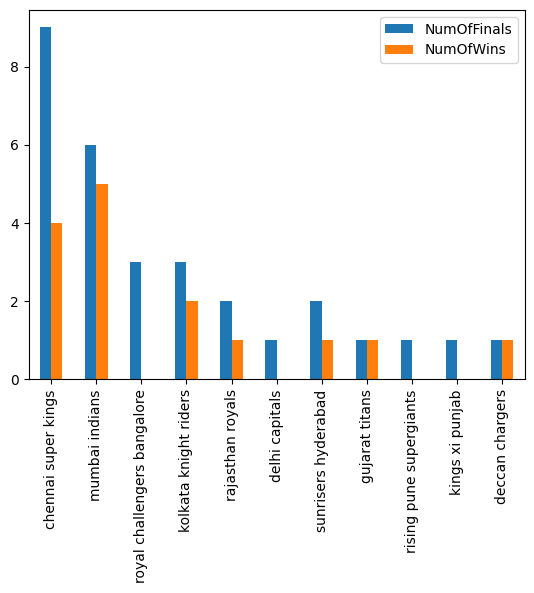

In [88]:
trophywins[['NumOfFinals', 'NumOfWins']].plot.bar()

In [89]:
#Number of matches played at each venue
df['Venue'].value_counts()

eden gardens                                            77
wankhede stadium                                        73
m chinnaswamy stadium                                   65
feroz shah kotla                                        60
rajiv gandhi international stadium, uppal               49
ma chidambaram stadium, chepauk                         48
sawai mansingh stadium                                  47
dubai international cricket stadium                     46
punjab cricket association stadium, mohali              35
wankhede stadium, mumbai                                31
sheikh zayed stadium                                    29
sharjah cricket stadium                                 28
maharashtra cricket association stadium                 22
dr dy patil sports academy, mumbai                      20
dr dy patil sports academy                              17
brabourne stadium, mumbai                               17
subrata roy sahara stadium                              

In [90]:
len(df['Venue'].value_counts())

49

In [91]:
st = 'narendra modi stadium, ahmedabad'
st.split(',')[0]

'narendra modi stadium'

In [92]:
df['Venue Stadium'] = df['Venue'].apply(lambda x : x.split(',')[0])   #TO seperate stadium names and remove city name

In [93]:
df['Venue Stadium'].value_counts()

wankhede stadium                                       104
eden gardens                                            79
ma chidambaram stadium                                  67
m chinnaswamy stadium                                   65
rajiv gandhi international stadium                      64
feroz shah kotla                                        60
sawai mansingh stadium                                  47
dubai international cricket stadium                     46
dr dy patil sports academy                              37
maharashtra cricket association stadium                 35
punjab cricket association stadium                      35
sheikh zayed stadium                                    29
sharjah cricket stadium                                 28
brabourne stadium                                       27
punjab cricket association is bindra stadium            21
arun jaitley stadium                                    18
subrata roy sahara stadium                              

In [94]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Venue Stadium
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,...,gujarat titans,wickets,7.0,NaN,hh pandya,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",cb gaffaney,nitin menon,narendra modi stadium
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,...,rajasthan royals,wickets,7.0,NaN,jc buttler,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...",cb gaffaney,nitin menon,narendra modi stadium
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,"eden gardens, kolkata",lucknow super giants,field,...,royal challengers bangalore,runs,14.0,NaN,rm patidar,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['q de kock', 'kl rahul', 'm vohra', 'dj hooda...",j madanagopal,ma gough,eden gardens
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,"eden gardens, kolkata",gujarat titans,field,...,gujarat titans,wickets,7.0,NaN,da miller,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",bnj oxenford,vk sharma,eden gardens
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,"wankhede stadium, mumbai",sunrisers hyderabad,bat,...,punjab kings,wickets,5.0,NaN,harpreet brar,"['pk garg', 'abhishek sharma', 'ra tripathi', ...","['jm bairstow', 's dhawan', 'm shahrukh khan',...",ak chaudhary,na patwardhan,wankhede stadium


In [95]:
def fix_stadiumNames(x):
  if x == 'm chinnaswamy stadium':
    return 'm.chinnaswamy stadium'
  elif x == 'punjab cricket association is bindra stadium':
    return 'punjab cricket association stadium'
  else:
    return x

In [96]:
df = df.applymap(fix_stadiumNames)
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Venue Stadium
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,...,gujarat titans,wickets,7.0,NaN,hh pandya,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",cb gaffaney,nitin menon,narendra modi stadium
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,...,rajasthan royals,wickets,7.0,NaN,jc buttler,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...",cb gaffaney,nitin menon,narendra modi stadium
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,"eden gardens, kolkata",lucknow super giants,field,...,royal challengers bangalore,runs,14.0,NaN,rm patidar,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['q de kock', 'kl rahul', 'm vohra', 'dj hooda...",j madanagopal,ma gough,eden gardens
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,"eden gardens, kolkata",gujarat titans,field,...,gujarat titans,wickets,7.0,NaN,da miller,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",bnj oxenford,vk sharma,eden gardens
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,"wankhede stadium, mumbai",sunrisers hyderabad,bat,...,punjab kings,wickets,5.0,NaN,harpreet brar,"['pk garg', 'abhishek sharma', 'ra tripathi', ...","['jm bairstow', 's dhawan', 'm shahrukh khan',...",ak chaudhary,na patwardhan,wankhede stadium


In [97]:
df['Venue'] = df['Venue Stadium'] + ', ' + df['City']
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Venue Stadium
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,...,gujarat titans,wickets,7.0,NaN,hh pandya,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",cb gaffaney,nitin menon,narendra modi stadium
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,...,rajasthan royals,wickets,7.0,NaN,jc buttler,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...",cb gaffaney,nitin menon,narendra modi stadium
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,"eden gardens, kolkata",lucknow super giants,field,...,royal challengers bangalore,runs,14.0,NaN,rm patidar,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['q de kock', 'kl rahul', 'm vohra', 'dj hooda...",j madanagopal,ma gough,eden gardens
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,"eden gardens, kolkata",gujarat titans,field,...,gujarat titans,wickets,7.0,NaN,da miller,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",bnj oxenford,vk sharma,eden gardens
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,"wankhede stadium, mumbai",sunrisers hyderabad,bat,...,punjab kings,wickets,5.0,NaN,harpreet brar,"['pk garg', 'abhishek sharma', 'ra tripathi', ...","['jm bairstow', 's dhawan', 'm shahrukh khan',...",ak chaudhary,na patwardhan,wankhede stadium


In [98]:
df['Venue'].value_counts()

wankhede stadium, mumbai                                              104
eden gardens, kolkata                                                  79
ma chidambaram stadium, chennai                                        67
m.chinnaswamy stadium, bangalore                                       65
rajiv gandhi international stadium, hyderabad                          64
feroz shah kotla, delhi                                                60
punjab cricket association stadium, chandigarh                         56
sawai mansingh stadium, jaipur                                         47
maharashtra cricket association stadium, pune                          35
sheikh zayed stadium, abu dhabi                                        29
dr dy patil sports academy, mumbai                                     28
brabourne stadium, mumbai                                              27
arun jaitley stadium, delhi                                            18
subrata roy sahara stadium, pune      

In [99]:
len(df['Venue'].value_counts())

39

In [100]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Venue Stadium
0,1312200,ahmedabad,2022-05-29,2022,final,rajasthan royals,gujarat titans,"narendra modi stadium, ahmedabad",rajasthan royals,bat,...,gujarat titans,wickets,7.0,NaN,hh pandya,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",cb gaffaney,nitin menon,narendra modi stadium
1,1312199,ahmedabad,2022-05-27,2022,qualifier 2,royal challengers bangalore,rajasthan royals,"narendra modi stadium, ahmedabad",rajasthan royals,field,...,rajasthan royals,wickets,7.0,NaN,jc buttler,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...",cb gaffaney,nitin menon,narendra modi stadium
2,1312198,kolkata,2022-05-25,2022,eliminator,royal challengers bangalore,lucknow super giants,"eden gardens, kolkata",lucknow super giants,field,...,royal challengers bangalore,runs,14.0,NaN,rm patidar,"['v kohli', 'f du plessis', 'rm patidar', 'gj ...","['q de kock', 'kl rahul', 'm vohra', 'dj hooda...",j madanagopal,ma gough,eden gardens
3,1312197,kolkata,2022-05-24,2022,qualifier 1,rajasthan royals,gujarat titans,"eden gardens, kolkata",gujarat titans,field,...,gujarat titans,wickets,7.0,NaN,da miller,"['ybk jaiswal', 'jc buttler', 'sv samson', 'd ...","['wp saha', 'shubman gill', 'ms wade', 'hh pan...",bnj oxenford,vk sharma,eden gardens
4,1304116,mumbai,2022-05-22,2022,70,sunrisers hyderabad,punjab kings,"wankhede stadium, mumbai",sunrisers hyderabad,bat,...,punjab kings,wickets,5.0,NaN,harpreet brar,"['pk garg', 'abhishek sharma', 'ra tripathi', ...","['jm bairstow', 's dhawan', 'm shahrukh khan',...",ak chaudhary,na patwardhan,wankhede stadium


In [101]:
#Venue wise result of batting first winner vs batting second winner
df.groupby('Venue')['WonBy'].value_counts()

Venue                             WonBy    
arun jaitley stadium, delhi       wickets       9
                                  runs          8
                                  superover     1
barabati stadium, cuttack         runs          4
                                  wickets       3
                                               ..
wankhede stadium, mumbai          wickets      56
                                  runs         47
                                  superover     1
zayed cricket stadium, abu dhabi  wickets       5
                                  runs          3
Name: WonBy, Length: 89, dtype: int64

In [102]:
df_venueStats =  df.groupby('Venue')['WonBy'].value_counts().unstack().fillna(0)
df_venueStats

WonBy,noresults,runs,superover,wickets
Venue,,,,
"arun jaitley stadium, delhi",0.0,8.0,1.0,9.0
"barabati stadium, cuttack",0.0,4.0,0.0,3.0
"brabourne stadium, mumbai",0.0,14.0,0.0,13.0
"buffalo park, east london",0.0,2.0,0.0,1.0
"de beers diamond oval, kimberley",0.0,1.0,0.0,2.0
"dr dy patil sports academy, mumbai",0.0,12.0,0.0,16.0
"dr dy patil sports academy, navi mumbai",0.0,5.0,0.0,4.0
"dr. y.s. rajasekhara reddy aca-vdca cricket stadium, visakhapatnam",0.0,7.0,0.0,6.0
"dubai international cricket stadium, dubai",0.0,4.0,0.0,9.0


<Axes: xlabel='Venue'>

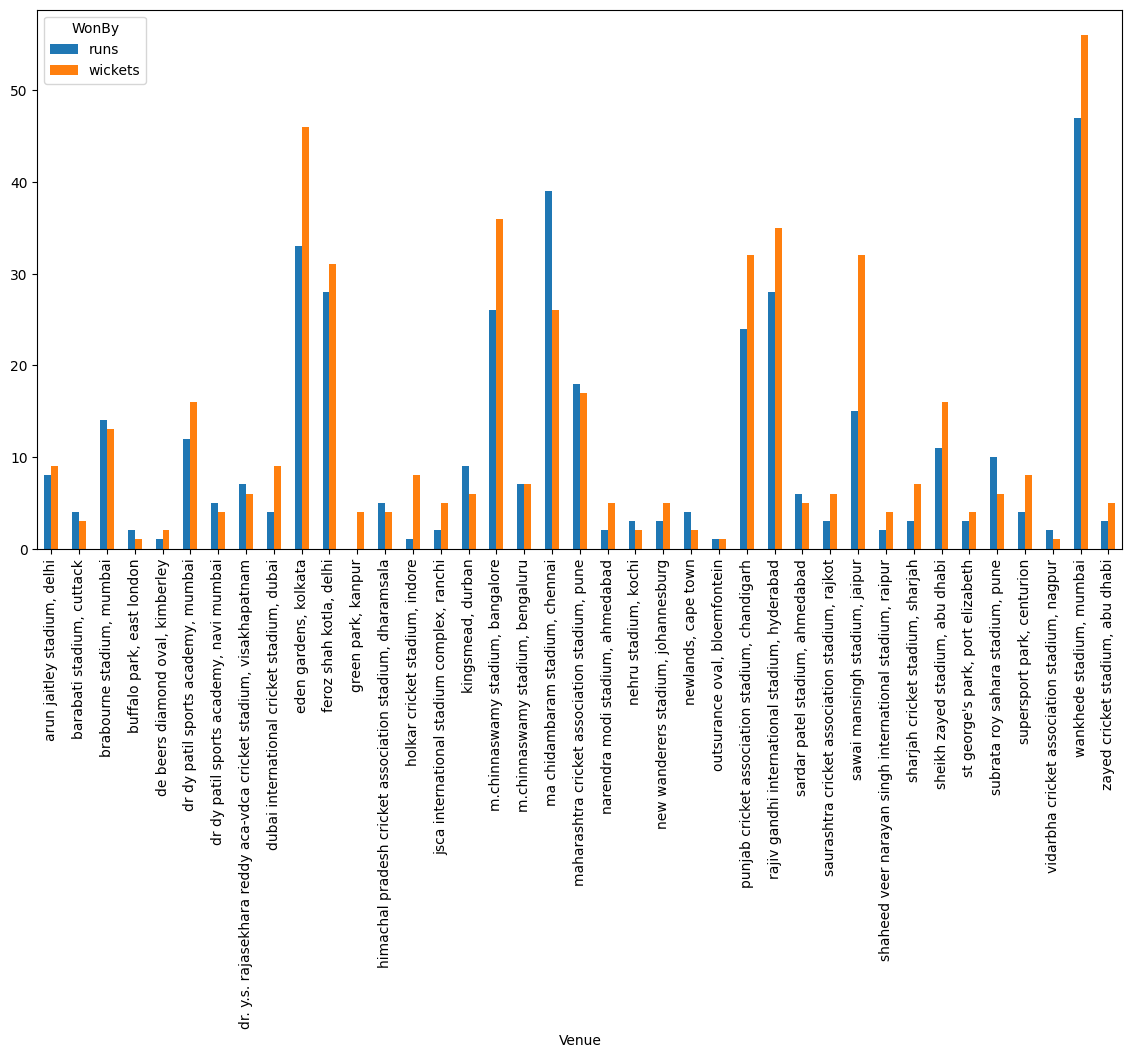

In [103]:
df_venueStats[['runs','wickets']].plot.bar(figsize = (14,7))

1. Number of matches where batting 1st team won vs batting 2nd team won
2. Number of matches where toss winner won the match
3. Venue wise result of batting first winner vs batting second winner
4. Maximum player of match award

In [104]:
#Number of matches where batting 1st team won vs batting 2nd team won
#winning by runs = winning while doing batting first
#winning by wickets = winning while doing batting second

df['WonBy'].value_counts()

wickets      509
runs         423
superover     14
noresults      4
Name: WonBy, dtype: int64

In [105]:
round((df['WonBy'].value_counts()/len(df)) * 100 , 2)

wickets      53.58
runs         44.53
superover     1.47
noresults     0.42
Name: WonBy, dtype: float64

In [106]:
#Number of matches where toss winner won the match
(df['TossWinner'] == df['WinningTeam']).sum()

489

In [107]:
(df['TossWinner'] == df['WinningTeam']).sum() / len(df)

0.5147368421052632

In [108]:
#Maximum player of match award
pom = df['Player_of_Match'].value_counts()
pom

ab de villiers    25
ch gayle          22
da warner         18
rg sharma         18
ms dhoni          17
                  ..
cr brathwaite      1
mohsin khan        1
a zampa            1
bcj cutting        1
mf maharoof        1
Name: Player_of_Match, Length: 262, dtype: int64

In [109]:
df = pd.read_csv('imdb_1000.csv')
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


1. Total number of movies present in the data
2. List of Movies with ratings more then 8
3. List of Movies with duration more then 145
4. List of Movies with rating more then 8.5 and duration less then 150 and genre - Crime, Comedy or Action
5. Movies list with 'Tim Robbins' as an actor
6. Number of genre and num of movies in each genre
7. Average, Minimum, and Maximum rating and duration of each genre of Movies.

In [110]:
df.drop_duplicates()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [111]:
#Total number of movies present in the data
df.shape[0]

979

In [112]:
df[df['star_rating'] > 8]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
292,8.1,The Manchurian Candidate,APPROVED,Mystery,126,"[u'Frank Sinatra', u'Laurence Harvey', u'Janet..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
294,8.1,Beauty and the Beast,G,Animation,84,"[u""Paige O'Hara"", u'Robby Benson', u'Richard W..."
295,8.1,The Truman Show,PG,Drama,103,"[u'Jim Carrey', u'Ed Harris', u'Laura Linney']"


In [113]:
#List of Movies with duration more then 145
(df['duration'] > 145).sum()

147

In [114]:
df_duration_more_145 = df[df['duration'] > 145]
df_duration_more_145

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
...,...,...,...,...,...,...
909,7.5,Harry Potter and the Sorcerer's Stone,PG,Adventure,152,"[u'Daniel Radcliffe', u'Rupert Grint', u'Richa..."
941,7.4,A Bridge Too Far,PG,Drama,175,"[u'Sean Connery', u""Ryan O'Neal"", u'Michael Ca..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
964,7.4,Lincoln,PG-13,Biography,150,"[u'Daniel Day-Lewis', u'Sally Field', u'David ..."


In [115]:
#Movies list with 'Tim Robbins' as an actor
df[df['actors_list'] == 'Tim Robbins']

,star_rating,title,content_rating,genre,duration,actors_list


In [116]:
df[df['actors_list'].str.contains('Tim Robbins')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
365,8.0,Mystic River,R,Crime,138,"[u'Sean Penn', u'Tim Robbins', u'Kevin Bacon']"
611,7.7,Short Cuts,R,Comedy,187,"[u'Andie MacDowell', u'Julianne Moore', u'Tim ..."
693,7.7,The Player,R,Comedy,124,"[u'Tim Robbins', u'Greta Scacchi', u'Fred Ward']"
819,7.6,Jacob's Ladder,R,Drama,113,"[u'Tim Robbins', u'Elizabeth Pe\xf1a', u'Danny..."


In [117]:
#Number of genre and num of movies in each genre
df['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [118]:
df.groupby('genre').mean()

<ipython-input-118-4a3fa5f1ddbb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('genre').mean()


,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [119]:
#Average, Minimum, and Maximum rating and duration of each genre of Movies.
df.groupby('genre')['star_rating','duration'].agg(['mean','min','max'])

<ipython-input-119-0bc0895a9014>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('genre')['star_rating','duration'].agg(['mean','min','max'])


star_rating              duration          
                 mean  min  max        mean  min  max
genre                                                
Action       7.884559  7.4  9.0  126.485294   80  205
Adventure    7.933333  7.4  8.9  134.840000   89  224
Animation    7.914516  7.4  8.6   96.596774   75  134
Biography    7.862338  7.4  8.9  131.844156   85  202
Comedy       7.822436  7.4  8.6  107.602564   68  187
Crime        7.916935  7.4  9.3  122.298387   67  229
Drama        7.902518  7.4  8.9  126.539568   64  242
Family       7.850000  7.8  7.9  107.500000  100  115
Fantasy      7.700000  7.7  7.7  112.000000  112  112
Film-Noir    8.033333  7.7  8.3   97.333333   88  111
History      8.000000  8.0  8.0   66.000000   66   66
Horror       7.806897  7.4  8.6  102.517241   70  146
Mystery      7.975000  7.4  8.6  115.625000   69  160
Sci-Fi       7.920000  7.7  8.2  109.000000   91  132
Thriller     7.680000  7.5  8.0  114.200000  107  120
Western      8.255556  7.6  8.9  136.666667   85  175

In [120]:
df = pd.read_csv('drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


1. Total size of data
2. Number of continent
3. Number of countries in each continent in the given data
4. Average, Minimum & Maximum servings of beer, spirit and wine in each continent
5. Name of Countries with Maximum servings of beer , spirit & wine respectively

In [121]:
df['country'].nunique()

193

In [122]:
df['country'].value_counts()

Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: country, Length: 193, dtype: int64

In [123]:
df.groupby('country')['beer_servings', 'spirit_servings', 'wine_servings'].agg(['mean' , 'min' , 'max'])

<ipython-input-123-83423330763e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('country')['beer_servings', 'spirit_servings', 'wine_servings'].agg(['mean' , 'min' , 'max'])


beer_servings           spirit_servings           wine_servings  \
                     mean  min  max            mean  min  max          mean   
country                                                                       
Afghanistan           0.0    0    0             0.0    0    0           0.0   
Albania              89.0   89   89           132.0  132  132          54.0   
Algeria              25.0   25   25             0.0    0    0          14.0   
Andorra             245.0  245  245           138.0  138  138         312.0   
Angola              217.0  217  217            57.0   57   57          45.0   
...                   ...  ...  ...             ...  ...  ...           ...   
Venezuela           333.0  333  333           100.0  100  100           3.0   
Vietnam             111.0  111  111             2.0    2    2           1.0   
Yemen                 6.0    6    6             0.0    0    0           0.0   
Zambia               32.0   32   32            19.0   19   19           4.0   
Zimbabwe             64.0   64   64            18.0   18   18           4.0   

                       
             min  max  
country                
Afghanistan    0    0  
Albania       54   54  
Algeria       14   14  
Andorra      312  312  
Angola        45   45  
...          ...  ...  
Venezuela      3    3  
Vietnam        1    1  
Yemen          0    0  
Zambia         4    4  
Zimbabwe       4    4  

[193 rows x 9 columns]

In [124]:
#how to find which liqour is maximum served in each countrty
df[['beer_servings', 'spirit_servings', 'wine_servings']].max(axis=1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [125]:
df['MaxServed'] = df[['beer_servings', 'spirit_servings', 'wine_servings']].idxmax(axis=1)

In [126]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,MaxServed
0,Afghanistan,0,0,0,0.0,beer_servings
1,Albania,89,132,54,4.9,spirit_servings
2,Algeria,25,0,14,0.7,beer_servings
3,Andorra,245,138,312,12.4,wine_servings
4,Angola,217,57,45,5.9,beer_servings


In [127]:
df['MaxServed'].value_counts()

beer_servings      114
spirit_servings     59
wine_servings       20
Name: MaxServed, dtype: int64

In [128]:
df.groupby('country')['MaxServed'].value_counts()

country      MaxServed      
Afghanistan  beer_servings      1
Albania      spirit_servings    1
Algeria      beer_servings      1
Andorra      wine_servings      1
Angola       beer_servings      1
                               ..
Venezuela    beer_servings      1
Vietnam      beer_servings      1
Yemen        beer_servings      1
Zambia       beer_servings      1
Zimbabwe     beer_servings      1
Name: MaxServed, Length: 193, dtype: int64

In [129]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding = 'latin-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [130]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [131]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [132]:
#seperate numerical & non numerical features

non_num_features = [feature for feature in df.columns if df[feature].dtype == 'object']
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']

df_non_num = df[non_num_features]
df_num = df[num_features]

In [133]:
df_non_num.head()

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
0,T-Series,Music,T-Series,India,IN,Music,Mar
1,YouTube Movies,Film & Animation,youtubemovies,United States,US,Games,Mar
2,MrBeast,Entertainment,MrBeast,United States,US,Entertainment,Feb
3,Cocomelon - Nursery Rhymes,Education,Cocomelon - Nursery Rhymes,United States,US,Education,Sep
4,SET India,Shows,SET India,India,IN,Entertainment,Sep


In [134]:
df_num.head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [135]:
for feature in df.columns:
  print(feature, df[feature].nunique())

rank 995
Youtuber 995
subscribers 289
video views 988
category 18
Title 992
uploads 777
Country 49
Abbreviation 49
channel_type 14
video_views_rank 953
country_rank 246
channel_type_rank 286
video_views_for_the_last_30_days 908
lowest_monthly_earnings 557
highest_monthly_earnings 736
lowest_yearly_earnings 757
highest_yearly_earnings 419
subscribers_for_last_30_days 53
created_year 19
created_month 12
created_date 31
Gross tertiary education enrollment (%) 47
Population 48
Unemployment rate 47
Urban_population 48
Latitude 48
Longitude 48


We have invormation about 995 Youtube channels in 18 categories from 49 countries.

We have few missing values are also there

In [136]:
df1 = df.copy()
df1 = df1.sort_values('subscribers', ascending = False)
df1.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [137]:
df1.head(15)['channel_type'].value_counts()

Music            5
Entertainment    5
Games            2
Education        1
People           1
Sports           1
Name: channel_type, dtype: int64

Top YouTube Channels in terms of Subscribers



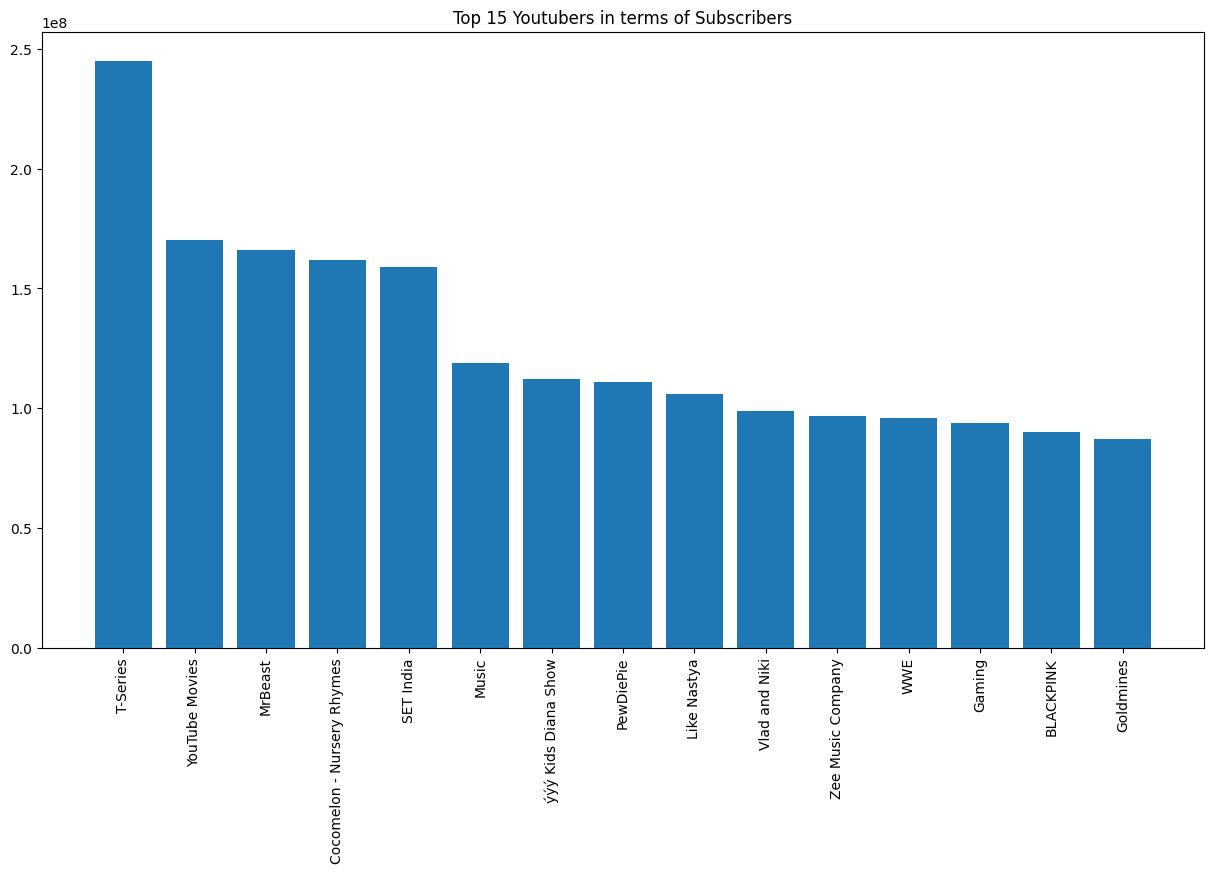

In [138]:
plt.figure(figsize = (15,8))

plt.bar(height = 'subscribers' , x = 'Youtuber' , data = df1.head(15))

plt.xticks(rotation = 90)
plt.title("Top 15 Youtubers in terms of Subscribers")
plt.show()

['0.0M', '50.0M', '100.0M', '150.0M', '200.0M', '250.0M', '300.0M']


<ipython-input-139-48b666cd4d5c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{label/1000000}M' for label in ax.get_yticks()])


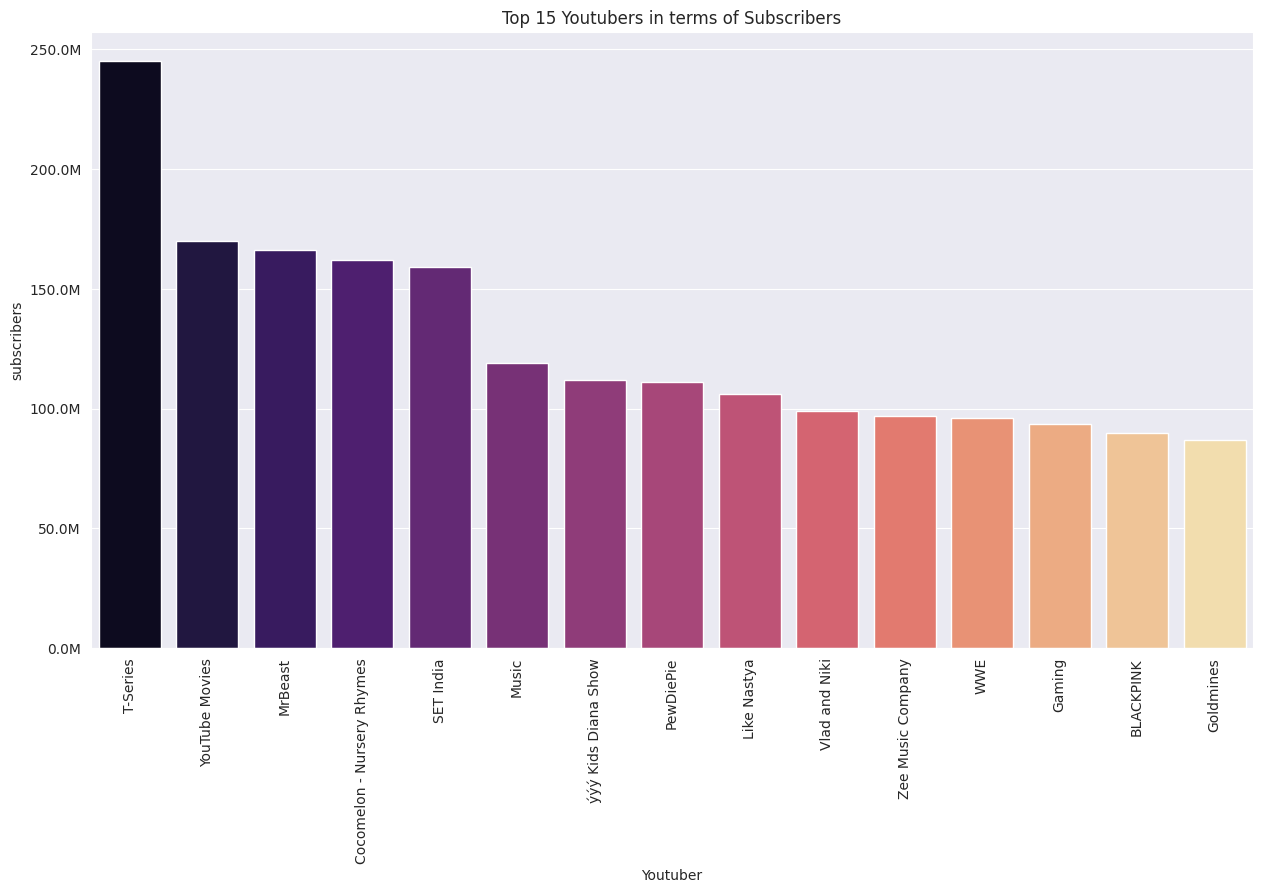

In [139]:
plt.figure(figsize = (15,8))

sns.set_style('darkgrid')
ax = sns.barplot(y = 'subscribers' , x = 'Youtuber' , data = df1.head(15),
                 palette='magma')

print([f'{label/1000000}M' for label in ax.get_yticks()])

plt.xticks(rotation = 90)
ax.set_yticklabels([f'{label/1000000}M' for label in ax.get_yticks()])
plt.title("Top 15 Youtubers in terms of Subscribers")
plt.show()

1. T-Series is having maximum numbers of Subscribers over 250 Millions and Maximum Views over 200 Billion.
2. Next top 2 channels in terms of views are Cocomelon & SetIndia
3. In terms of views top 15 channels have 7 Entertainment and 4 Music channels
4. In terms of views top 15 channels have 6 from India and 6 from US

In [140]:
df_num.head()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,245000000,2.280000e+11,20082,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2000000.0,2006.0,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,170000000,0.000000e+00,1,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,NaN,2006.0,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,166000000,2.836884e+10,741,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,8000000.0,2012.0,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,162000000,1.640000e+11,966,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,1000000.0,2006.0,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,159000000,1.480000e+11,116536,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,1000000.0,2006.0,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [141]:
df_num.corr()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.640608,-0.453363,-0.051036,-0.059455,0.016776,-0.029554,-0.186339,-0.248394,-0.248050,...,-0.248392,-0.188571,0.106025,-0.006256,-0.037491,-0.025475,-0.014860,-0.038807,0.000036,0.019003
subscribers,-0.640608,1.000000,0.750958,0.077136,0.057202,0.032683,0.027393,0.278846,0.388941,0.388579,...,0.388935,0.309527,-0.141827,-0.011836,-0.006804,0.082219,-0.008251,0.083521,0.019450,0.022443
video views,-0.453363,0.750958,1.000000,0.165928,-0.061807,-0.068277,-0.050194,0.361856,0.552096,0.551455,...,0.552091,0.187384,-0.127068,-0.038180,-0.015232,0.080214,-0.000729,0.076649,0.037334,0.031268
uploads,-0.051036,0.077136,0.165928,1.000000,-0.108988,-0.078394,-0.098450,0.101521,0.166922,0.167283,...,0.166904,0.008933,-0.154904,0.034900,-0.218396,0.143122,-0.188101,0.072807,-0.067868,0.233169
video_views_rank,-0.059455,0.057202,-0.061807,-0.108988,1.000000,0.877504,0.949936,-0.067193,-0.208863,-0.208935,...,-0.208851,-0.167295,0.006671,0.031231,0.046934,-0.103178,-0.029276,-0.122747,0.015932,-0.016492
country_rank,0.016776,0.032683,-0.068277,-0.078394,0.877504,1.000000,0.898442,-0.098737,-0.148947,-0.148960,...,-0.148946,-0.126175,-0.037807,-0.012699,0.103290,-0.053181,0.066697,-0.024578,0.048323,-0.072476
channel_type_rank,-0.029554,0.027393,-0.050194,-0.098450,0.949936,0.898442,1.000000,-0.129051,-0.187908,-0.187970,...,-0.187896,-0.154021,-0.014002,0.038299,0.062484,-0.116254,0.003697,-0.123852,0.010195,-0.055144
video_views_for_the_last_30_days,-0.186339,0.278846,0.361856,0.101521,-0.067193,-0.098737,-0.129051,1.000000,0.680330,0.680289,...,0.680330,0.451523,0.053123,-0.013670,-0.035610,0.053859,-0.002323,0.051126,-0.026864,0.049033
lowest_monthly_earnings,-0.248394,0.388941,0.552096,0.166922,-0.208863,-0.148947,-0.187908,0.680330,1.000000,0.999955,...,0.999998,0.679360,0.072316,-0.040269,-0.062190,0.104812,-0.042874,0.081206,0.006583,0.100379
highest_monthly_earnings,-0.248050,0.388579,0.551455,0.167283,-0.208935,-0.148960,-0.187970,0.680289,0.999955,1.000000,...,0.999953,0.679699,0.072289,-0.039959,-0.061973,0.104785,-0.042627,0.081226,0.006873,0.100299


In [142]:
np.tril(np.ones((5,5)))

array([[1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.]])

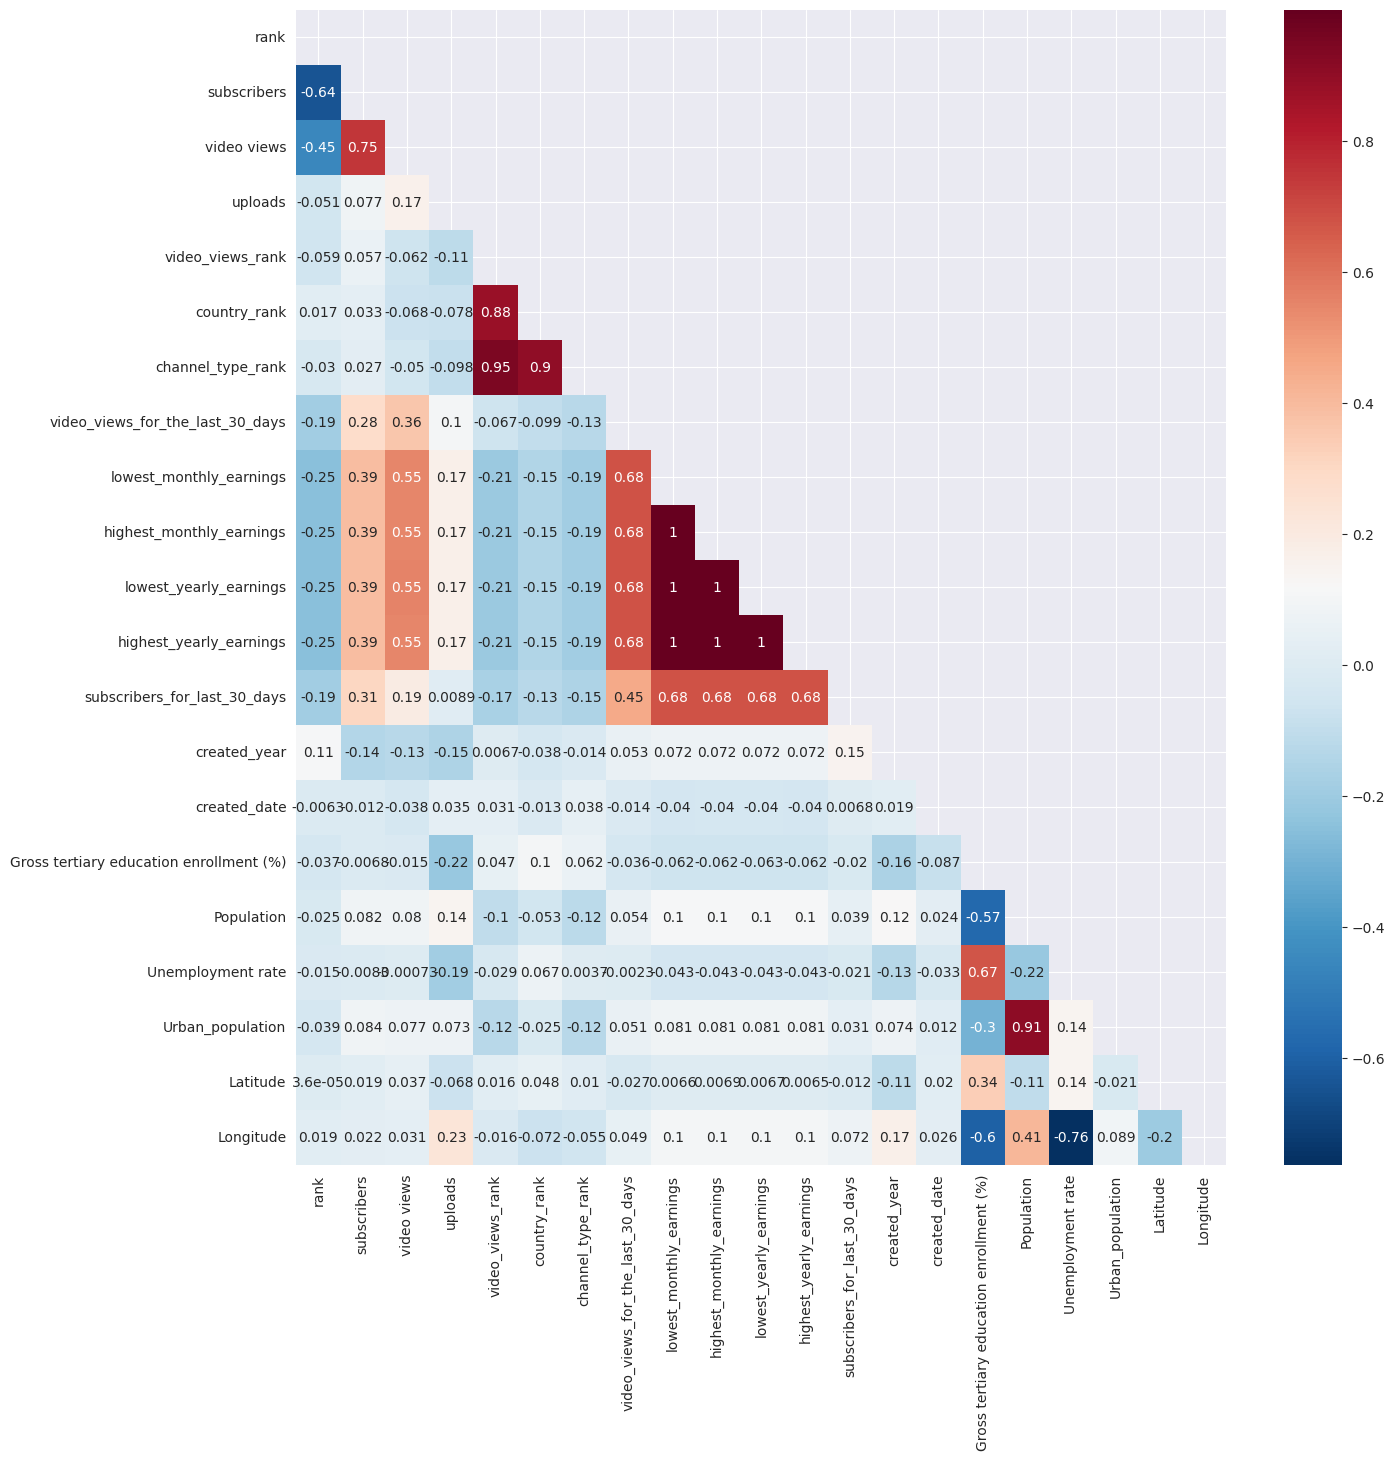

In [143]:
plt.figure(figsize = (15,15))

msk = np.triu(np.ones_like(df_num.corr()))

sns.heatmap(df_num.corr() , annot=True , cmap = plt.cm.RdBu_r , mask = msk)

plt.show()

In [144]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [145]:
# Number of Subscriber in each country
df.groupby('Country')['subscribers'].sum().sort_values(ascending=False)

Country
United States           7329500000
India                   4310600000
Brazil                  1221800000
United Kingdom           917400000
Mexico                   626900000
Indonesia                534100000
South Korea              481700000
Russia                   407200000
Thailand                 386500000
Spain                    385100000
Canada                   363900000
Argentina                328500000
Colombia                 264500000
Philippines              240100000
Japan                    189100000
Saudi Arabia             179100000
Australia                172000000
Pakistan                 155400000
United Arab Emirates     148200000
Ukraine                  125600000
Germany                  116400000
Turkey                    91600000
Chile                     87200000
France                    83900000
Jordan                    67000000
Sweden                    63000000
Singapore                 59700000
Netherlands               58100000
Vietnam     

1. Total number of youtube accounts in the dataset
2. Number of youtubers from each category

In [146]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [147]:
df['Youtuber'].nunique()

995

In [149]:
df.groupby('category')['Youtuber'].count().sort_values(ascending=False)

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Autos & Vehicles           2
Nonprofits & Activism      2
Movies                     2
Travel & Events            1
Name: Youtuber, dtype: int64

In [150]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [151]:
countCountry = df[['Youtuber','Country','Latitude','Longitude']]
countCountry.head()

,Youtuber,Country,Latitude,Longitude
0,T-Series,India,20.593684,78.962880
1,YouTube Movies,United States,37.090240,-95.712891
2,MrBeast,United States,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,United States,37.090240,-95.712891
4,SET India,India,20.593684,78.962880


In [152]:
numYoutuberCountry = countCountry.groupby(['Country',
                                           'Latitude',
                                           'Longitude'])['Youtuber'].count().reset_index().sort_values('Youtuber',
                                                                                                       ascending = False)
numYoutuberCountry

,Country,Latitude,Longitude,Youtuber
45,United States,37.090240,-95.712891,313
17,India,20.593684,78.962880,168
5,Brazil,-14.235004,-51.925280,62
44,United Kingdom,55.378051,-3.435973,43
26,Mexico,23.634501,-102.552784,33
18,Indonesia,-0.789275,113.921327,28
37,Spain,40.463667,-3.749220,22
40,Thailand,15.870032,100.992541,18
36,South Korea,35.907757,127.766922,17
32,Russia,61.524010,105.318756,16


In [153]:
import plotly.express as px

fig = px.scatter_geo(numYoutuberCountry , lat = 'Latitude', lon = 'Longitude' ,
                     hover_name = 'Youtuber',color = 'Country',
                    title = "Youtuber count in each Country",
                    color_continuous_scale = 'deep')

fig.update_layout(height = 450 , font = dict(family = 'Times New Roman', size = 15))

fig.update_geos(showland = True , landcolor = 'orange' ,
                showocean=True , oceancolor = 'lightblue')

fig.show()

In [154]:
top15Youtubers =  df1[['Youtuber','subscribers','category',
                       'created_year','Country','Latitude','Longitude']].head(15)
top15Youtubers

,Youtuber,subscribers,category,created_year,Country,Latitude,Longitude
0,T-Series,245000000,Music,2006.0,India,20.593684,78.962880
1,YouTube Movies,170000000,Film & Animation,2006.0,United States,37.090240,-95.712891
2,MrBeast,166000000,Entertainment,2012.0,United States,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,Education,2006.0,United States,37.090240,-95.712891
4,SET India,159000000,Shows,2006.0,India,20.593684,78.962880
5,Music,119000000,NaN,2013.0,NaN,NaN,NaN
6,ýýý Kids Diana Show,112000000,People & Blogs,2015.0,United States,37.090240,-95.712891
7,PewDiePie,111000000,Gaming,2010.0,Japan,36.204824,138.252924
8,Like Nastya,106000000,People & Blogs,2016.0,Russia,61.524010,105.318756
9,Vlad and Niki,98900000,Entertainment,2018.0,United States,37.090240,-95.712891


In [155]:
aggregatetop15 = top15Youtubers.groupby(['Country','Latitude',
                                         'Longitude'])['Youtuber'].count().reset_index()
aggregatetop15

,Country,Latitude,Longitude,Youtuber
0,India,20.593684,78.962880,3
1,Japan,36.204824,138.252924,1
2,Russia,61.524010,105.318756,1
3,South Korea,35.907757,127.766922,1
4,United States,37.090240,-95.712891,6


In [156]:
import folium
folium.Map(location = [20.593684,78.962880],zoom_start=4)

In [157]:
import plotly.express as px

fig = px.scatter_geo(aggregatetop15 , lat = 'Latitude', lon = 'Longitude' ,
                     hover_name = 'Youtuber',color = 'Country',
                    title = "Youtuber count in each Country",
                    color_continuous_scale = 'deep')

fig.update_layout(height = 450 , font = dict(family = 'Times New Roman', size = 15))

fig.update_geos(showland = True , landcolor = 'lightyellow' ,
                showocean=True , oceancolor = 'lightblue')
fig.show()

In [158]:
df['created_year'].unique()

array([2006., 2012., 2013., 2015., 2010., 2016., 2018., 2014., 2007.,
       2020., 2008., 2005., 2011., 2009., 2017., 2021., 1970., 2019.,
         nan, 2022.])

In [159]:
df['created_year'].isnull().sum()

5

In [161]:
#Number of samples with created tear 1970
(df['created_year'] == 1970).sum()

1

In [162]:
#Remove null values sample and remove sample with created year 1970
df3 = df.dropna(subset = 'created_year')
df4 = df3[~df3['created_year'].isin([1970])]
df4.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [163]:
#Year Wise Youtube account created
year_count = df4.groupby('created_year')['Youtuber'].count().reset_index()
year_count

,created_year,Youtuber
0,2005.0,24
1,2006.0,91
2,2007.0,49
3,2008.0,46
4,2009.0,52
5,2010.0,48
6,2011.0,82
7,2012.0,68
8,2013.0,76
9,2014.0,98


<Axes: xlabel='created_year', ylabel='Youtuber'>

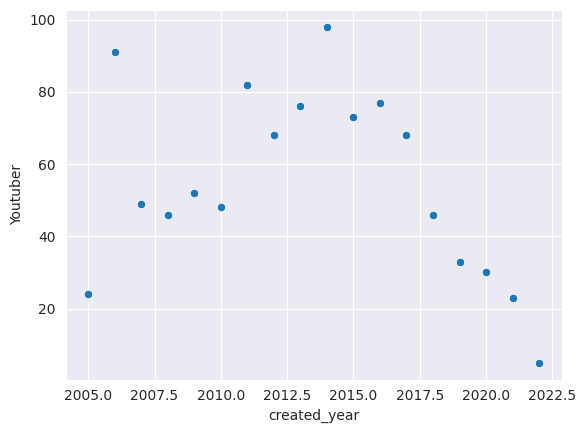

In [164]:
sns.scatterplot(year_count , x = 'created_year' , y = 'Youtuber')

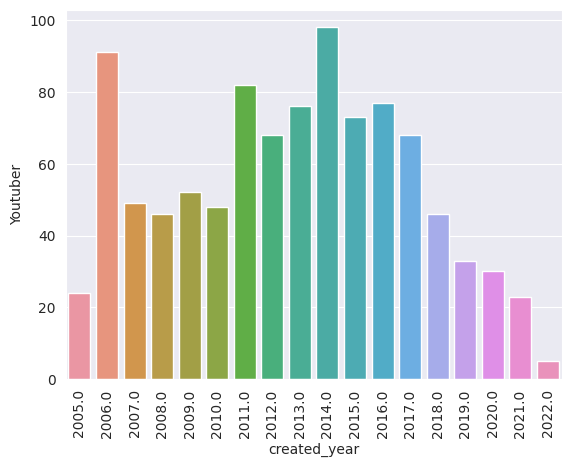

In [165]:
sns.barplot(year_count , x = 'created_year' , y = 'Youtuber')
plt.xticks(rotation=90)
plt.show()

In [166]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


<Axes: xlabel='subscribers', ylabel='video views'>

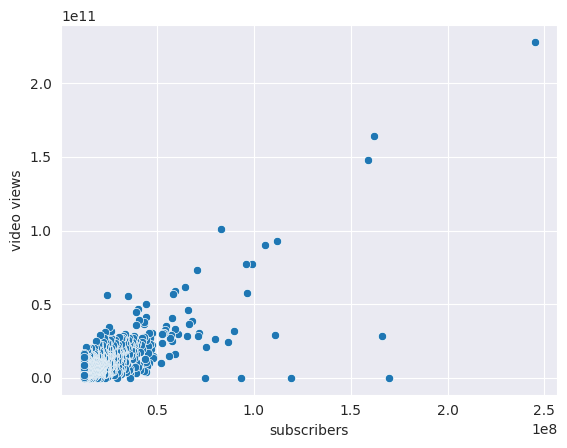

In [168]:
sns.scatterplot(df , x = 'subscribers' , y = 'video views')